In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
X_train_path = '../data/processed/X_train.csv'
X_test_path = '../data/processed/X_test.csv'
y_train_path = '../data/processed/y_train.csv'
y_test_path = '../data/processed/y_test.csv'

X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path).squeeze()
y_test = pd.read_csv(y_test_path).squeeze()

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFeatures:", X_train.columns.tolist())

Training set shape: (121310, 10)
Test set shape: (30328, 10)

Features: ['PartyType_Code', 'Sobriety_Code', 'Age', 'PrimaryCollisionFactor_Code', 'CollisionType_Code', 'VehicleDamage_Code', 'MovementPrecedingCollision_Code', 'ViolationCode', 'CrashTime', 'Distance']


Accuracy: 0.66
Confusion Matrix:
[[14002  2168   471    45     9]
 [ 2578  4750  1068    94    17]
 [ 1096  1748   993   105    25]
 [  216   324   241    96    19]
 [   41    81    68    24    49]]
Classification Report:
              precision    recall  f1-score   support

    NoInjury       0.78      0.84      0.81     16695
       Minor       0.52      0.56      0.54      8507
    Moderate       0.35      0.25      0.29      3967
      Severe       0.26      0.11      0.15       896
       Fatal       0.41      0.19      0.26       263

    accuracy                           0.66     30328
   macro avg       0.47      0.39      0.41     30328
weighted avg       0.63      0.66      0.64     30328



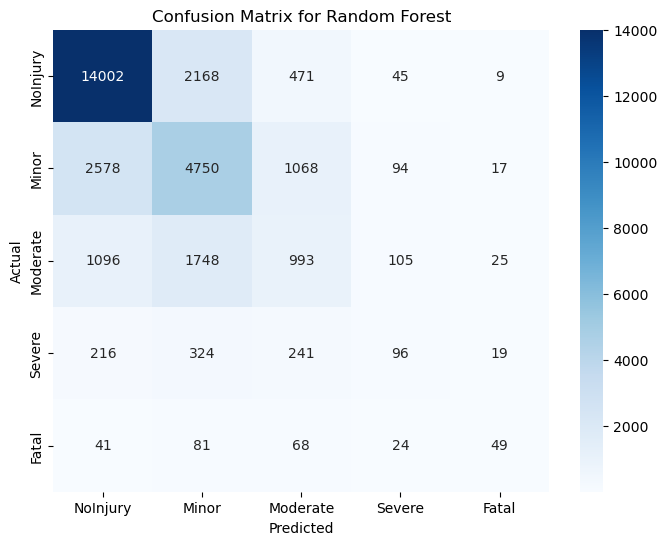

In [3]:
severity_mapping = {'NoInjury': 0, 'Minor': 1, 'Moderate': 2, 'Severe': 3, 'Fatal': 4}
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = rf.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix and Classification Report
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=severity_mapping.keys()))

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=severity_mapping.keys(), yticklabels=severity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
# 1. Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(                               # type: ignore
    X, y, test_size=0.2, random_state=42, stratify=y                               # type: ignore
)

# 2. Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 3. Make predictions on test set
y_pred = rf.predict(X_test)

# 4. Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)

# 5. Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. Generate detailed classification report
class_report = classification_report(
    y_test, 
    y_pred, 
    target_names=severity_mapping.keys()
)

In [ ]:
import os
import joblib
import json

# Ensure the directories exist
os.makedirs('../models', exist_ok=True)
os.makedirs('../parameters', exist_ok=True)

# Save the trained Random Forest model
joblib.dump(rf, '../models/random_forest.pkl')

# Save the model parameters
parameters = {
    "model_type": "RandomForest",
    "parameters": {
        "n_estimators": rf.n_estimators,
        "max_depth": rf.max_depth,
        "min_samples_split": rf.min_samples_split,
        "min_samples_leaf": rf.min_samples_leaf,
        "random_state": rf.random_state
    }
}
with open('../parameters/random_forest_parameters.json', 'w') as f:
    json.dump(parameters, f, indent=4)

print("Random Forest model and parameters saved.")
